<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)
pd.set_option('display.max_columns', None)

# Display the first few rows of the datasetz
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [11]:
## Write your code here
print('DATA_type:\n',df.dtypes)
print('\nColums Name:', df.columns.tolist())
df.info()
print('\nNumber columns and rows', df.shape)
print('\nCount of duplicates:', df.duplicated().sum())
print('\nNumber of Nan', df.isnull().sum())

DATA_type:
 ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Colums Name: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith'

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [12]:
df[['JobSat','YearsCodePro', 'LanguageHaveWorkedWith','LanguageWantToWorkWith','EdLevel']].head(10)

,JobSat,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,EdLevel
0,NaN,NaN,NaN,NaN,Primary/elementary school
1,NaN,17,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
2,NaN,27,C#,C#,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
3,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,Some college/university study without earning ...
4,NaN,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python,"Secondary school (e.g. American high school, G..."
5,NaN,NaN,Bash/Shell (all shells);HTML/CSS;Java;JavaScri...,Bash/Shell (all shells);HTML/CSS;Java;JavaScri...,Primary/elementary school
6,NaN,7,R,R,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)"
7,NaN,NaN,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,"Secondary school (e.g. American high school, G..."
8,NaN,NaN,Lua,Lua,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)"
9,NaN,11,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"


In [13]:
df[['JobSat','YearsCodePro', 'LanguageHaveWorkedWith','LanguageWantToWorkWith','EdLevel']].isnull().sum()

JobSat                    36311
YearsCodePro              13827
LanguageHaveWorkedWith     5692
LanguageWantToWorkWith     9685
EdLevel                    4653
dtype: int64

In [14]:
## Write your code here
df[['LanguageHaveWorkedWith','LanguageWantToWorkWith','EdLevel']]=df[['LanguageHaveWorkedWith','LanguageWantToWorkWith','EdLevel']].fillna(df[['LanguageHaveWorkedWith','LanguageWantToWorkWith','EdLevel']].mode().iloc[0])
df = df.dropna(subset=[
    'Employment',
    'JobSat',
    'YearsCodePro'
])



In [15]:
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork                 9
                       ...  
JobSatPoints_11          115
SurveyLength             391
SurveyEase               352
ConvertedCompYearly    12317
JobSat                     0
Length: 114, dtype: int64

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [16]:
## Write your code here
Job_Satisfaction=pd.crosstab(df['JobSat'],df['YearsCodePro'])
Job_Satisfaction

YearsCodePro,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,25,26,27,28,29,3,30,31,32,33,34,35,36,37,38,39,4,40,41,42,43,44,45,46,47,48,49,5,50,6,7,8,9,Less than 1 year,More than 50 years
JobSat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,18,25,8,12,8,6,4,5,6,2,4,29,8,1,3,0,1,5,2,0,0,3,21,4,0,0,0,1,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,22,0,12,16,13,10,8,0
1.0,13,12,7,7,4,7,4,4,5,3,3,23,6,0,3,4,3,3,3,3,0,2,21,3,1,1,1,0,1,1,0,2,0,19,0,0,0,0,1,0,0,0,0,0,24,0,17,16,11,6,13,0
2.0,36,59,19,28,13,18,15,9,14,15,6,55,21,4,6,5,13,10,4,3,6,2,79,3,3,1,2,1,3,0,1,3,0,49,2,0,0,0,0,1,0,0,0,0,43,1,54,33,43,25,28,0
3.0,58,72,23,35,23,21,34,18,16,21,18,109,29,8,11,10,13,14,6,5,3,3,123,18,1,1,3,1,3,1,2,2,0,82,4,1,2,0,0,0,1,0,0,0,86,0,75,71,42,37,35,0
4.0,50,57,26,37,23,16,40,20,14,14,8,112,27,5,9,12,8,12,3,3,6,4,120,4,0,6,2,2,3,0,3,0,1,74,3,1,1,0,0,1,0,0,0,1,92,0,76,54,61,49,37,0
5.0,90,125,63,76,46,32,59,37,22,28,14,166,45,15,14,10,23,33,14,16,8,4,185,16,4,8,4,4,8,3,0,4,0,129,4,1,0,0,1,2,0,0,0,0,139,0,103,98,93,66,57,0
6.0,152,240,96,123,92,80,107,76,49,52,33,312,100,23,30,20,29,64,19,20,13,10,342,29,5,10,4,9,12,4,3,1,1,288,6,1,3,4,0,2,1,0,0,0,295,0,249,198,216,117,110,1
7.0,254,430,176,245,142,137,194,121,114,105,58,541,162,49,50,56,69,85,52,30,30,25,505,67,11,22,10,11,13,12,12,6,6,429,17,3,7,3,3,8,0,0,1,0,476,1,398,343,378,203,173,0
8.0,282,532,212,283,193,183,265,155,116,166,94,495,221,47,74,80,91,154,72,66,51,22,523,78,15,23,24,26,40,24,9,20,8,476,21,10,5,5,3,8,2,2,1,1,490,0,425,410,409,250,162,1


In [17]:
for col in ['Employment', 'JobSat', 'YearsCodePro']:
    print(f'\nDistribution for {col}')
    print(df[col].value_counts())



Distribution for Employment
Employment
Employed, full-time                                                                                                               21903
Employed, full-time;Independent contractor, freelancer, or self-employed                                                           2231
Independent contractor, freelancer, or self-employed                                                                               1242
Employed, part-time                                                                                                                 531
Employed, full-time;Student, part-time                                                                                              488
                                                                                                                                  ...  
Employed, full-time;Not employed, but looking for work;Not employed, and not looking for work;Employed, part-time                     1
Student,

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


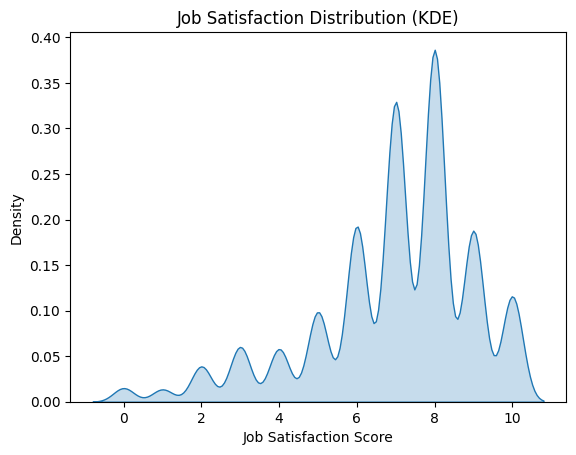

In [18]:
## Write your code here
sns.kdeplot(df['JobSat'], fill=True)
plt.title('Job Satisfaction Distribution (KDE)')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Density')
plt.show()

The KDE plot indicates a concentration of responses around mid-to-high job satisfaction values, with fewer respondents reporting extreme dissatisfaction. This suggests that most developers experience acceptable to high levels of job satisfaction.

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [19]:
## Write your code here

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


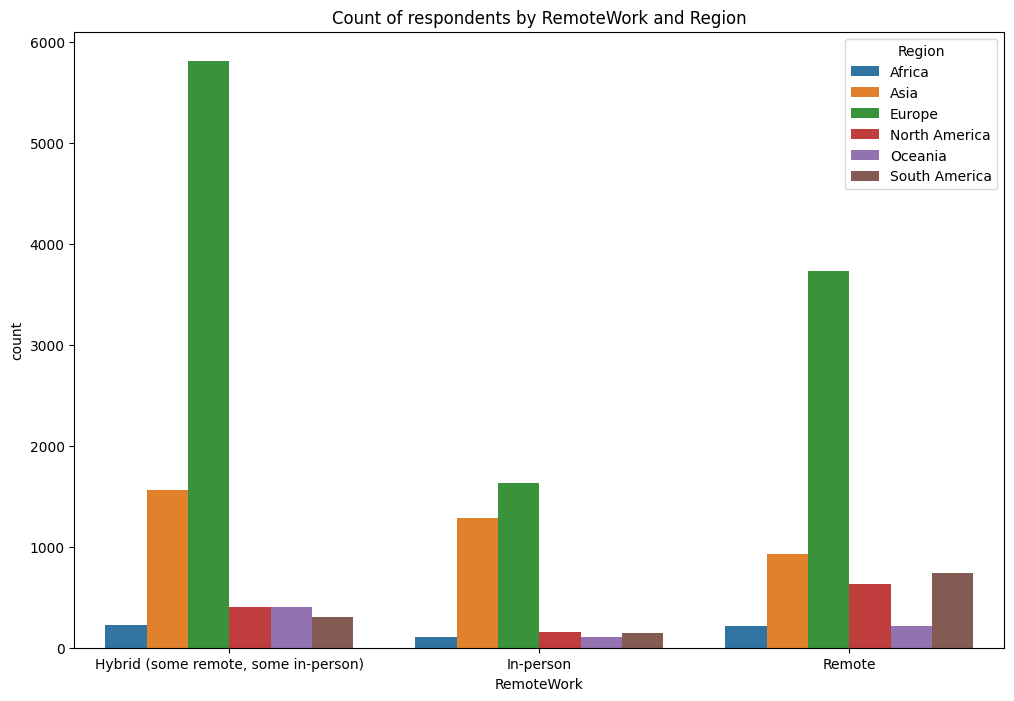

In [20]:
## Write your code here
country_to_region = {
    # North America
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',

    # Europe
    'United Kingdom': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'Spain': 'Europe',
    'Italy': 'Europe',
    'Netherlands': 'Europe',
    'Poland': 'Europe',
    'Sweden': 'Europe',
    'Norway': 'Europe',
    'Finland': 'Europe',
    'Denmark': 'Europe',
    'Belgium': 'Europe',
    'Switzerland': 'Europe',
    'Austria': 'Europe',
    'Ireland': 'Europe',
    'Portugal': 'Europe',
    'Czech Republic': 'Europe',
    'Slovakia': 'Europe',
    'Hungary': 'Europe',
    'Romania': 'Europe',
    'Bulgaria': 'Europe',
    'Ukraine': 'Europe',
    'Russia': 'Europe',

    # Asia
    'India': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia',
    'South Korea': 'Asia',
    'Indonesia': 'Asia',
    'Thailand': 'Asia',
    'Vietnam': 'Asia',
    'Philippines': 'Asia',
    'Malaysia': 'Asia',
    'Singapore': 'Asia',
    'Pakistan': 'Asia',
    'Bangladesh': 'Asia',
    'Sri Lanka': 'Asia',
    'Nepal': 'Asia',
    'Israel': 'Asia',
    'Turkey': 'Asia',

    # South America
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Peru': 'South America',
    'Uruguay': 'South America',

    # Africa
    'South Africa': 'Africa',
    'Nigeria': 'Africa',
    'Kenya': 'Africa',
    'Egypt': 'Africa',
    'Morocco': 'Africa',
    'Tunisia': 'Africa',
    'Ghana': 'Africa',

    # Oceania
    'Australia': 'Oceania',
    'New Zealand': 'Oceania'
}
df['Region']=df['Country'].map(country_to_region)

df = df.dropna(subset=['RemoteWork'])
rem_reg=df.groupby(['RemoteWork','Region']).size().reset_index(name='count')
plt.figure(figsize=(12,8))
sns.barplot(data=rem_reg, x='RemoteWork',y='count', hue='Region')
plt.title('Count of respondents by RemoteWork and Region')
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [21]:
df["YearsCodePro"]

12                     12
15                     27
18                     10
20       Less than 1 year
22                     18
               ...       
65178                  17
65241                  10
65265                   2
65351                   7
65412                  18
Name: YearsCodePro, Length: 28347, dtype: object

In [22]:
## Write your code here
df["YearsCodePro"]=df["YearsCodePro"].replace({
    'Less than 1 year':0,
    'More than 50 years':50
}).astype(float)
pearson_cor=df['JobSat'].corr(df['YearsCodePro'], method='pearson')
spearman_cor=df['JobSat'].corr(df['YearsCodePro'], method='spearman')
print(f"pearson_correlation: {pearson_cor:3f}")
print(f"spearman_correlation: {spearman_cor:3f}")

pearson_correlation: 0.103952
spearman_correlation: 0.119090


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


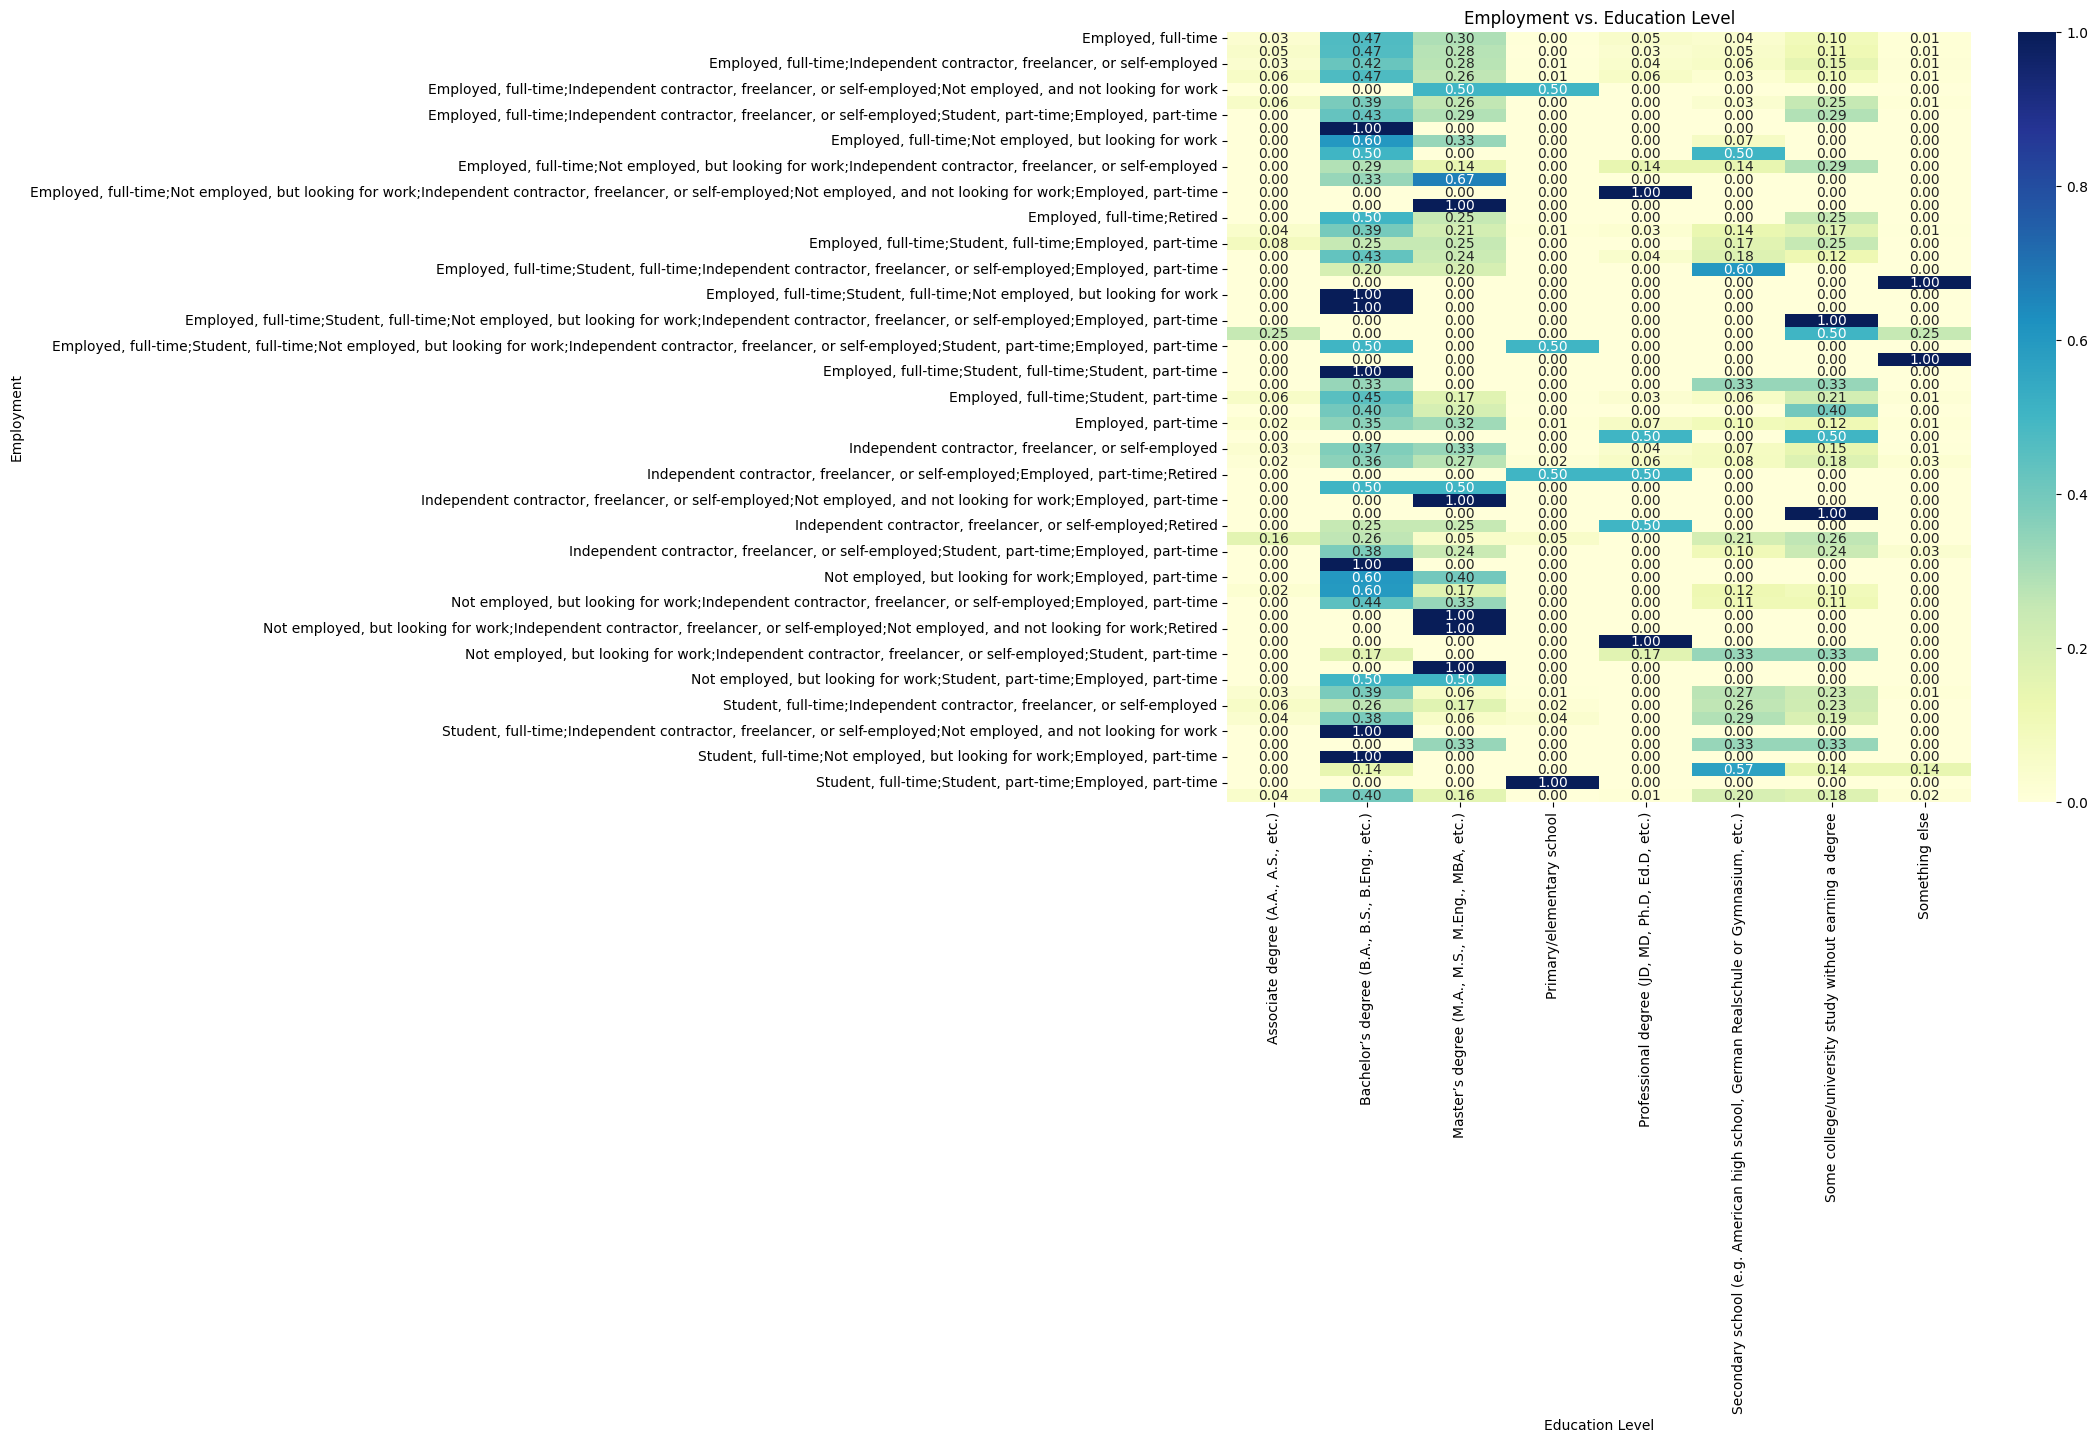

In [23]:
## Write your code here
em_ed=pd.crosstab(df['Employment'],df['EdLevel'],normalize='index')
em_ed
plt.figure(figsize=(12,10))
sns.heatmap(em_ed, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)

plt.title("Employment vs. Education Level")
plt.ylabel("Employment")
plt.xlabel("Education Level")
plt.show()

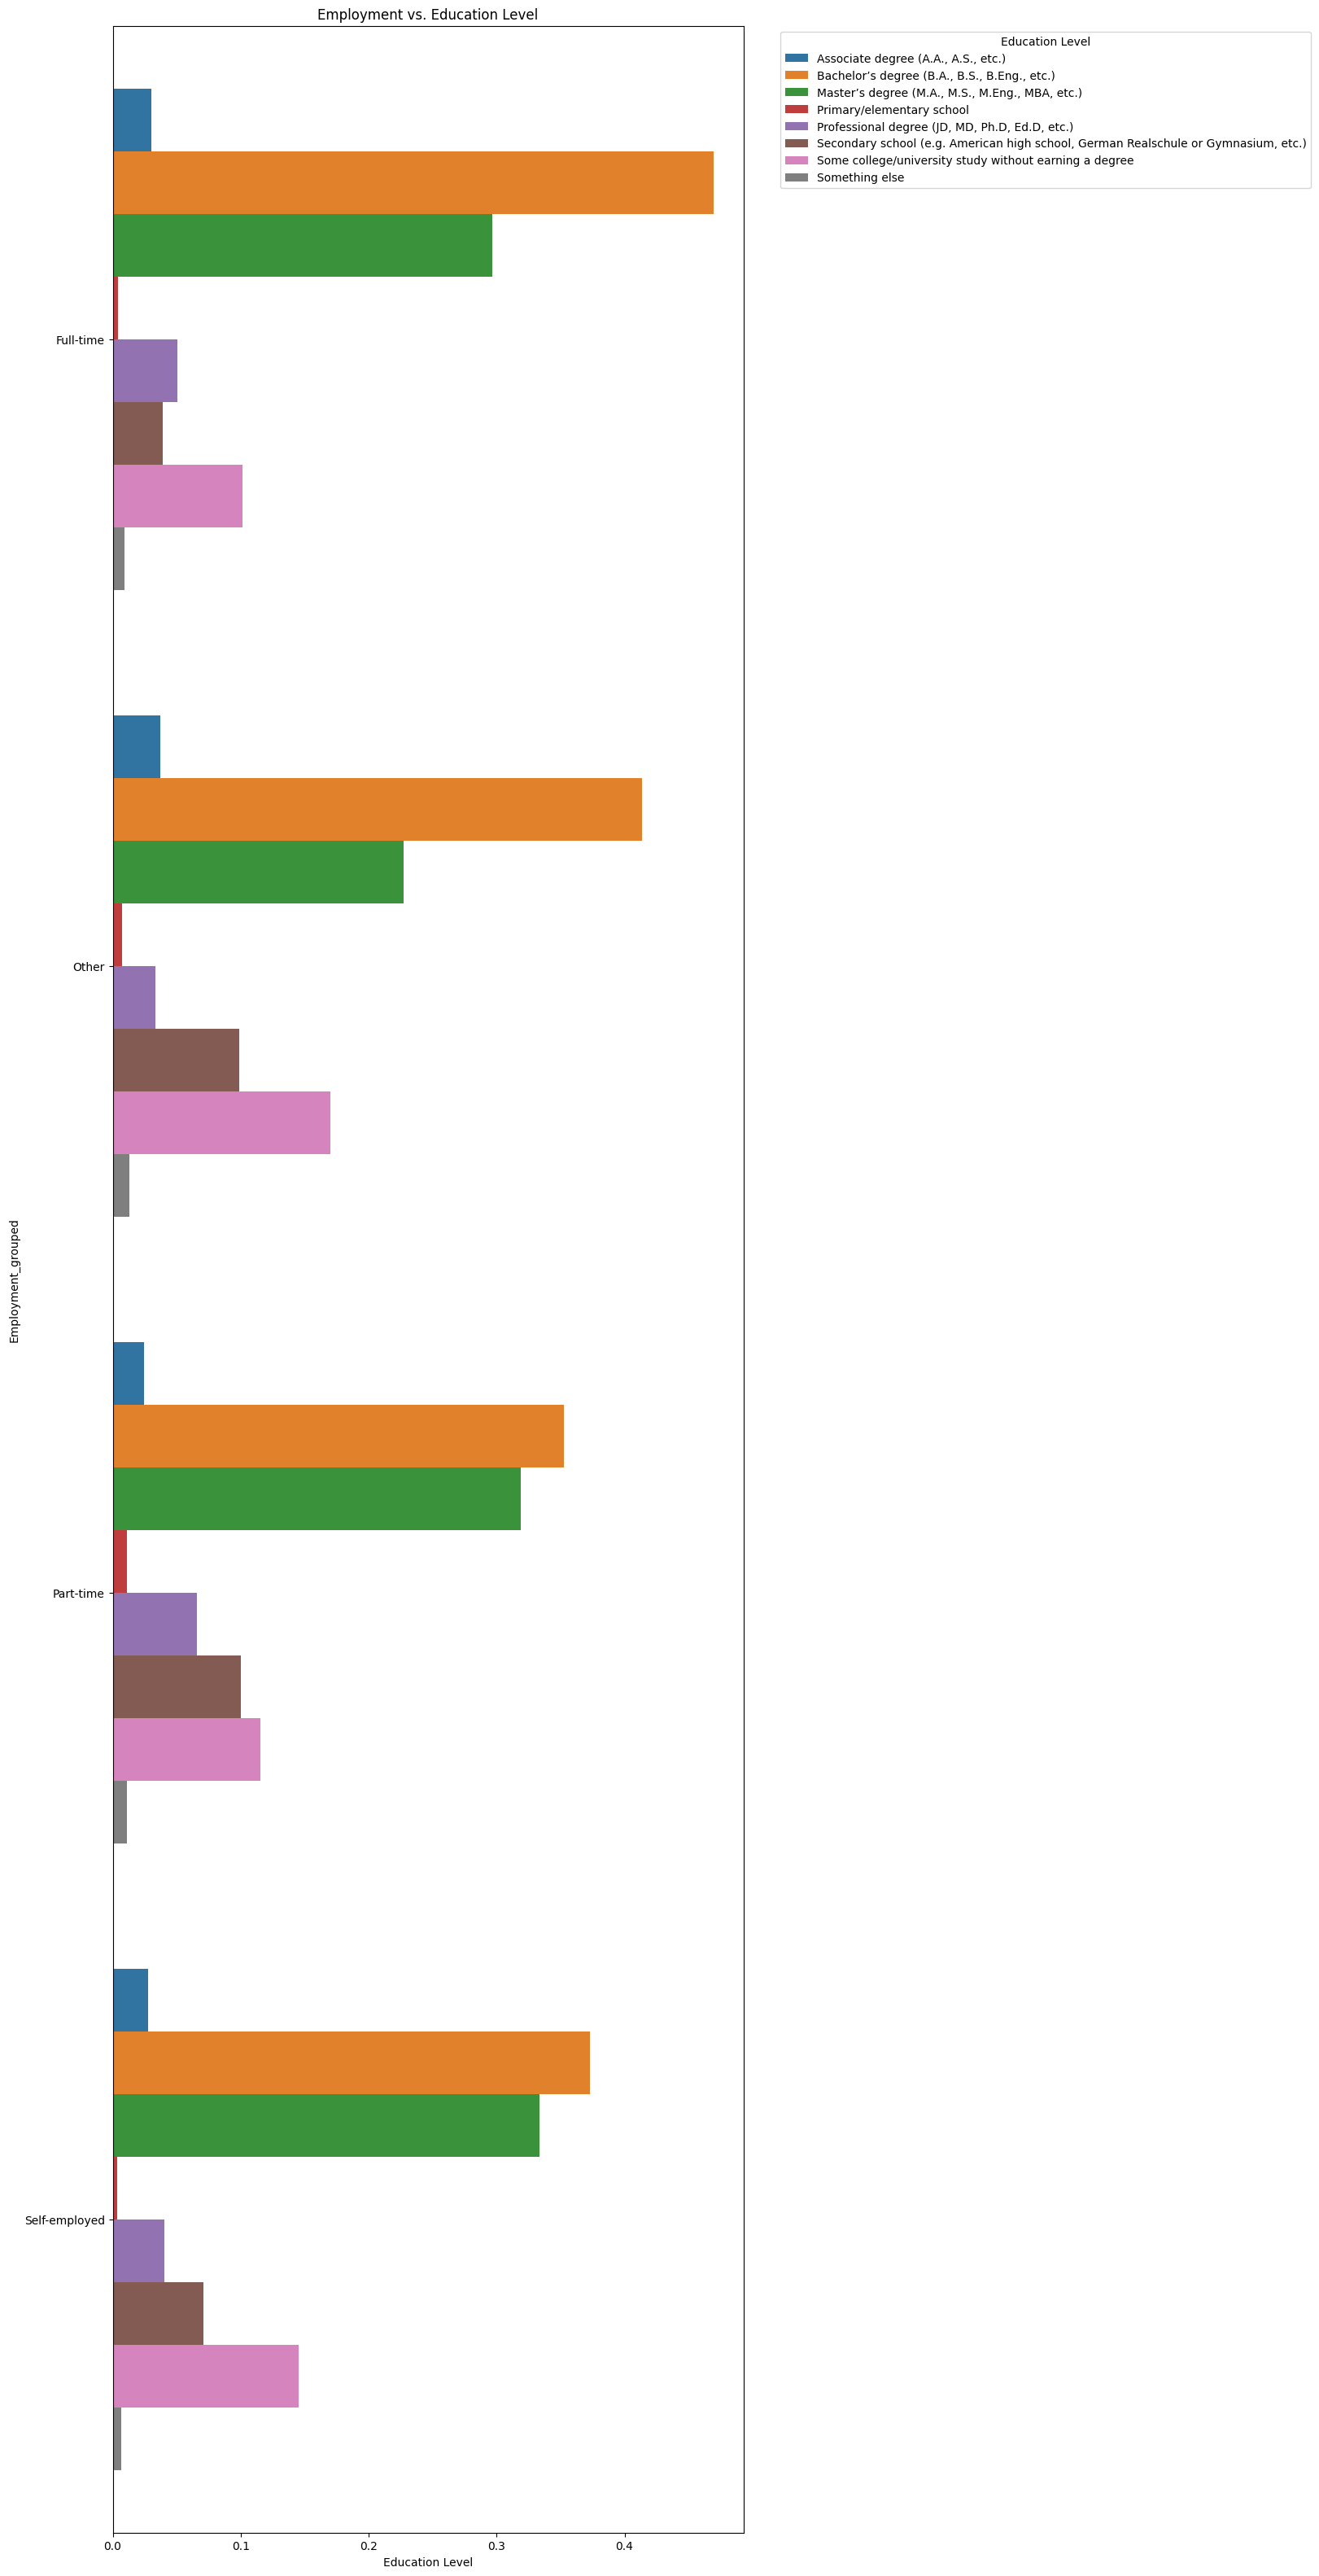

In [38]:
em_ed_long = em_ed.reset_index().melt(id_vars='Employment_grouped', 
                                      var_name='EdLevel', 
                                      value_name='Proportion')

plt.figure(figsize=(10,40))
sns.barplot(data=em_ed_long, x='Proportion', y='Employment_grouped', hue='EdLevel')

plt.title("Employment vs. Education Level")
plt.xlabel("Education Level")
plt.legend(
    title="Education Level",
    bbox_to_anchor=(1.05, 1))
plt.show()

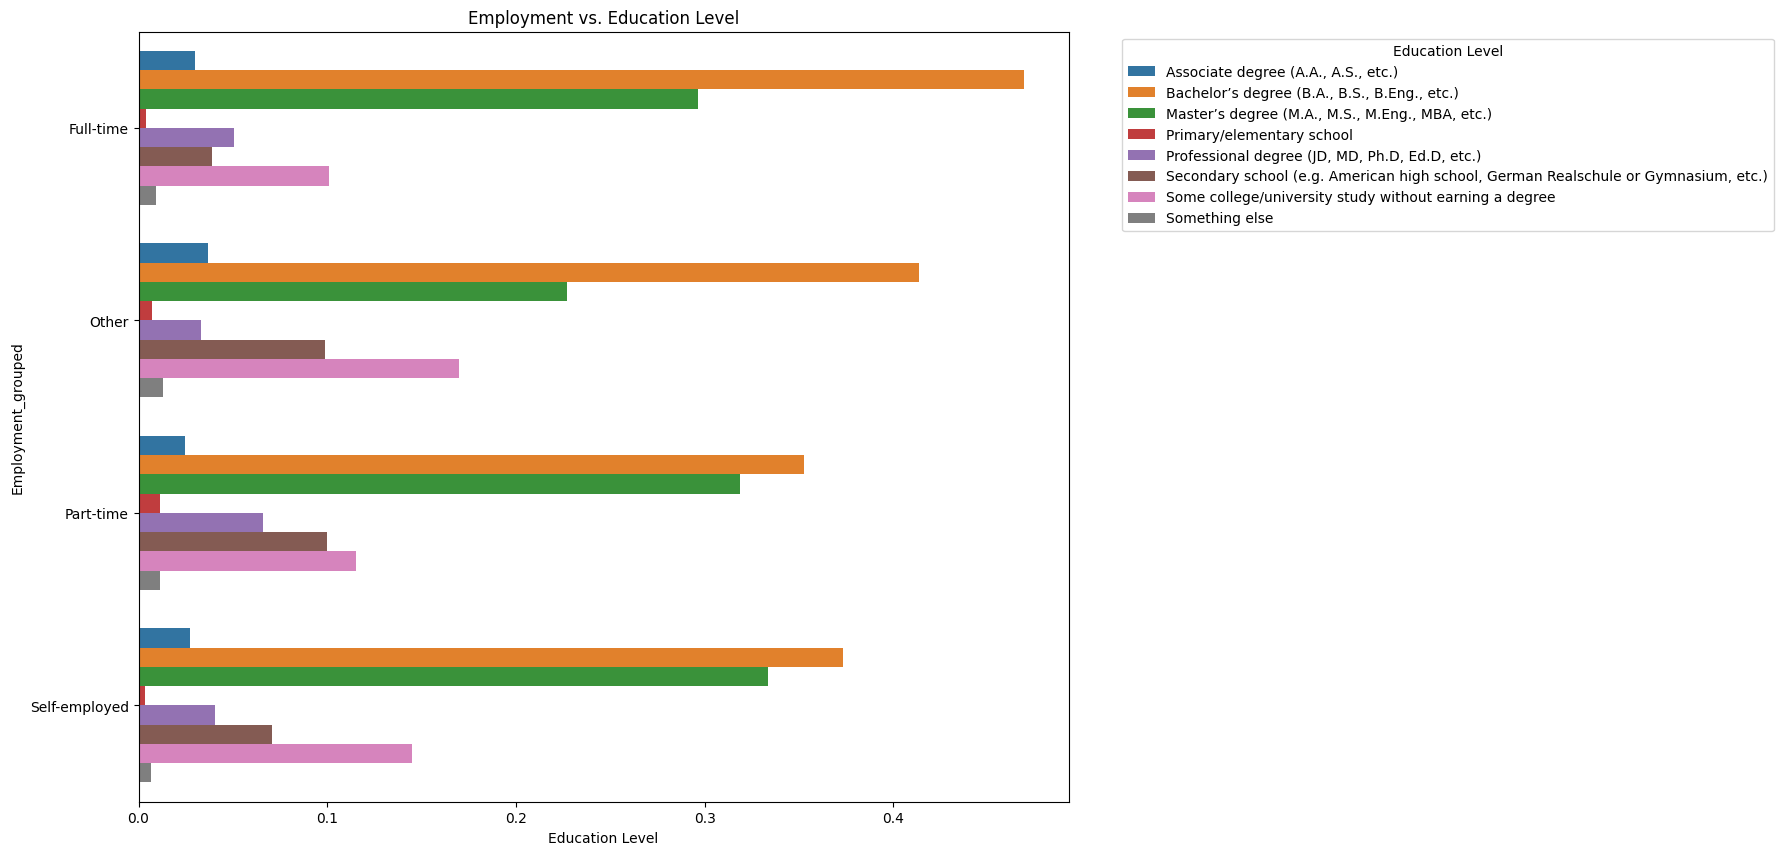

In [36]:
mapping = {
    'Employed, full-time': 'Full-time',
    'Employed, part-time': 'Part-time',
    'Independent contractor, freelancer, or self-employed': 'Self-employed',
    'Student, full-time': 'Student',
    'Student, part-time': 'Student'
}

df['Employment_grouped'] = df['Employment'].map(mapping).fillna('Other')
em_ed=pd.crosstab(df['Employment_grouped'],df['EdLevel'],normalize='index')
em_ed_long = em_ed.reset_index().melt(id_vars='Employment_grouped', 
                                      var_name='EdLevel', 
                                      value_name='Proportion')
plt.figure(figsize=(12,10))
sns.barplot(data=em_ed_long, x='Proportion', y='Employment_grouped', hue='EdLevel')

plt.title("Employment vs. Education Level")
plt.xlabel("Education Level")
plt.legend(
    title="Education Level",
    bbox_to_anchor=(1.05, 1))

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [39]:
## Write your code here
df.to_csv('распределения данных.csv')

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
